In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    import skfuzzy as fuzz
    import skfuzzy.membership as mf
except ModuleNotFoundError:
    !pip install scikit-fuzzy
    import skfuzzy as fuzz
    import skfuzzy.membership as mf

# Defining input ranges

First I define variables to control the ranges

Generate universe variables

In [3]:
def build_universe_of_variables():
    universe_of_variables = dict()
    universe_of_variables['x_withdrawal_percentage'] = np.arange(0, 1, 0.01)
    universe_of_variables['x_hour'] = np.arange(0, 23, 0.1)
    universe_of_variables['x_transactions_per_day'] = np.arange(0, 50, 0.5)
    universe_of_variables['x_transactions_per_month'] = np.arange(0, 50, 0.5)
    universe_of_variables['y_risk'] = np.arange(0, 1, 0.01)

    return universe_of_variables

In [4]:
universe_of_variables = build_universe_of_variables()

# Defining membership functions

In [5]:
def build_membership_functions(universe_of_variables):
    membership_functions = dict()
    membership_functions['w_per_lo'] = fuzz.sigmf(
        universe_of_variables['x_withdrawal_percentage'], 0.3, -40
        )
    membership_functions['w_per_md'] = fuzz.gbellmf(
        universe_of_variables['x_withdrawal_percentage'], 0.2, 4, 0.5
        )
    membership_functions['w_per_hi'] = fuzz.sigmf(
        universe_of_variables['x_withdrawal_percentage'], 0.7, 40
        )

    membership_functions['h_e_m'] = fuzz.sigmf(
        universe_of_variables['x_hour'], 6.5, -2
        )
    membership_functions['h_d'] = fuzz.gbellmf(
        universe_of_variables['x_hour'], 5, 5, 11.5
        )
    membership_functions['h_n'] = fuzz.sigmf(
        universe_of_variables['x_hour'], 16.5, 2
        )

    membership_functions['tran_p_day_l'] = fuzz.sigmf(
        universe_of_variables['x_transactions_per_day'], 25, -2
        )
    membership_functions['tran_p_day_h'] = fuzz.sigmf(
        universe_of_variables['x_transactions_per_day'], 25, 2
        )

    membership_functions['tran_p_month_l'] = fuzz.sigmf(
        universe_of_variables['x_transactions_per_month'], 25, -2
        )
    membership_functions['tran_p_month_h'] = fuzz.sigmf(
        universe_of_variables['x_transactions_per_month'], 25, 2
        )

    membership_functions['risk_lo'] = fuzz.sigmf(
        universe_of_variables['y_risk'], 0.3, -40
        )
    membership_functions['risk_md'] = fuzz.gbellmf(
        universe_of_variables['y_risk'], 0.2, 4, 0.5
        )
    membership_functions['risk_hi'] = fuzz.sigmf(
        universe_of_variables['y_risk'], 0.7, 40
        )

    return membership_functions

In [6]:
membership_functions = build_membership_functions(universe_of_variables)

### Plot the functions

In [7]:
#color_map = 'hsv'
color_map = 'rainbow'
def visualize_membership_functions(data_dict, dictionary_colors=None,
                                   color_palette=color_map, set_fill_area=None,
                                   set_bold_lines=None, set_dashed_lines=None):
    # Define a color palette
    color_palette = plt.cm.get_cmap(color_palette)

    # Visualize these universes and membership functions
    fig, axes = plt.subplots(nrows=len(data_dict), figsize=(6, 2 * (len(data_dict) + 1)))

    if set_bold_lines:
        alpha = 0.3
    else:
        alpha = 1

    for i, (ax_name, data) in enumerate(data_dict.items()):
        if isinstance(axes, np.ndarray):
            ax = axes[i]
        else:
            ax = axes

        for j, (category, values) in enumerate(data.items()):
            if category == 'x' or category == 'title':
                continue  # Skip 'x' and 'title' in dictionary

            if dictionary_colors and category in dictionary_colors:
                color = dictionary_colors[category]
            else:
                color = color_palette(j/(len(data) - 1))

            if set_dashed_lines and category in set_dashed_lines:
                line = '--'
            else:
                line = '-'

            if set_bold_lines and category in set_bold_lines:
                ax.plot(data['x'], values, linewidth=2, color='k')
            # Check if category is a string before adding tag
            elif isinstance(category, str):
                ax.plot(data['x'], values, label=category, linewidth=1.5,
                        color=color, alpha=alpha)
            else:
                ax.plot(data['x'], values, '--', linewidth=1.5, color=color,
                        alpha=alpha)

            if set_fill_area and category in set_fill_area:
                ax.fill_between(data['x'], 0, values, color=color, alpha=0.5)

        ax.plot(data['x'], 0.5*np.ones_like(data['x']), '--k', label="Min value mem. func.")
        ax.set_title(data['title'])

        # Display the legend in a place that does not obstruct the data
        ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1131450/45865598.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap(color_palette)


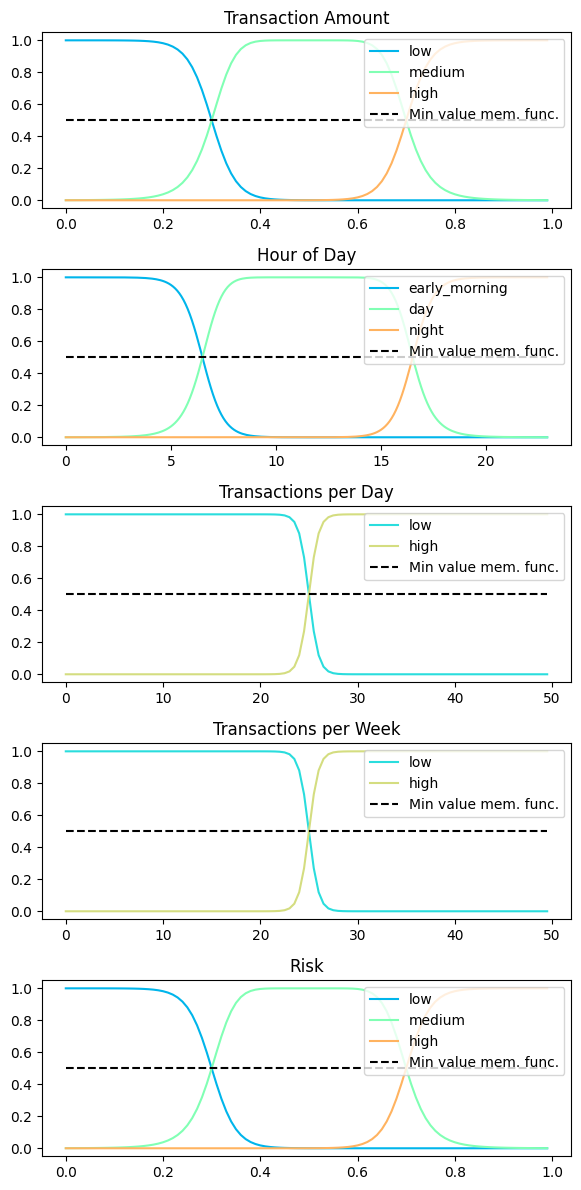

In [8]:
# Create a dictionary with the data
data_dict = {
    'ax0': {
        'x': universe_of_variables['x_withdrawal_percentage'],
        'low': membership_functions['w_per_lo'],
        'medium': membership_functions['w_per_md'],
        'high': membership_functions['w_per_hi'],
        'title': 'Transaction Amount'
        },
    'ax1': {
        'x': universe_of_variables['x_hour'],
        'early_morning': membership_functions['h_e_m'],
        'day': membership_functions['h_d'],
        'night': membership_functions['h_n'],
        'title': 'Hour of Day'
        },
    'ax2': {
        'x': universe_of_variables['x_transactions_per_day'],
        'low': membership_functions['tran_p_day_l'],
        'high': membership_functions['tran_p_day_h'],
        'title': 'Transactions per Day'
        },
    'ax3': {
        'x': universe_of_variables['x_transactions_per_month'],
        'low': membership_functions['tran_p_month_l'],
        'high': membership_functions['tran_p_month_h'],
        'title': 'Transactions per Week'
        },
    'ax4': {
        'x': universe_of_variables['y_risk'],
        'low': membership_functions['risk_lo'],
        'medium': membership_functions['risk_md'],
        'high': membership_functions['risk_hi'],
        'title': 'Risk'
        }
}

# Call the function with the dictionary as an argument
visualize_membership_functions(data_dict)

# Inputs

In [9]:
inputs = dict()
inputs['withdrawal_percentage'] = 0.7
inputs['hour'] = 9
inputs['transactions_per_day'] = 5
inputs['transactions_per_month'] = 20

# Defining rules

First, we need to interpolate the input to a value in the domain of the variables.

In [10]:
def interpolate_inputs(inputs, data_dict):
    interpolated_inputs = dict()
    # withdrawal_percentage
    interpolated_inputs['w_per_lo'] = fuzz.interp_membership(
        data_dict['ax0']['x'],
        data_dict['ax0']['low'],
        inputs['withdrawal_percentage']
        )
    interpolated_inputs['w_per_md'] = fuzz.interp_membership(
        data_dict['ax0']['x'],
        data_dict['ax0']['medium'],
        inputs['withdrawal_percentage']
        )
    interpolated_inputs['w_per_hi'] = fuzz.interp_membership(
        data_dict['ax0']['x'],
        data_dict['ax0']['high'],
        inputs['withdrawal_percentage']
        )

    # hour
    interpolated_inputs['h_e_m'] = fuzz.interp_membership(
        data_dict['ax1']['x'],
        data_dict['ax1']['early_morning'],
        inputs['hour']
        )
    interpolated_inputs['h_d'] = fuzz.interp_membership(
        data_dict['ax1']['x'],
        data_dict['ax1']['day'],
        inputs['hour']
        )
    interpolated_inputs['h_n'] = fuzz.interp_membership(
        data_dict['ax1']['x'],
        data_dict['ax1']['night'],
        inputs['hour']
        )

    # transactions_per_day
    interpolated_inputs['tran_p_day_l'] = fuzz.interp_membership(
        data_dict['ax2']['x'],
        data_dict['ax2']['low'],
        inputs['transactions_per_day']
        )
    interpolated_inputs['tran_p_day_h'] = fuzz.interp_membership(
        data_dict['ax2']['x'],
        data_dict['ax2']['high'],
        inputs['transactions_per_day']
        )

    # transactions_per_month
    interpolated_inputs['tran_p_month_l'] = fuzz.interp_membership(
        data_dict['ax3']['x'],
        data_dict['ax3']['low'],
        inputs['transactions_per_month']
        )
    interpolated_inputs['tran_p_month_h'] = fuzz.interp_membership(
        data_dict['ax3']['x'],
        data_dict['ax3']['high'],
        inputs['transactions_per_month']
        )

    return interpolated_inputs

In [11]:
interpolated_inputs = interpolate_inputs(inputs, data_dict)

Then, we can define the operands between the sets to obtain the antecedent

In [12]:
def build_rules(interpolated_inputs):
    rules = dict()

    # First block with low withdrawal percentage and all the other combinations
    rules[1] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_lo'], interpolated_inputs['h_e_m']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_l'])
    rules[2] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_lo'], interpolated_inputs['h_e_m']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_h'])
    rules[3] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_lo'], interpolated_inputs['h_e_m']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_l'])
    rules[4] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_lo'], interpolated_inputs['h_e_m']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_h'])
    rules[5] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_lo'], interpolated_inputs['h_d']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_l'])
    rules[6] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_lo'], interpolated_inputs['h_d']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_h'])
    rules[7] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_lo'], interpolated_inputs['h_d']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_l'])
    rules[8] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_lo'], interpolated_inputs['h_d']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_h'])
    rules[9] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_lo'], interpolated_inputs['h_n']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_l'])
    rules[10] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_lo'], interpolated_inputs['h_n']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_h'])
    rules[11] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_lo'], interpolated_inputs['h_n']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_l'])
    rules[12] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_lo'], interpolated_inputs['h_n']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_h'])

    # Second block with medium withdrawal percentage and all the other combinations
    rules[13] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_md'], interpolated_inputs['h_e_m']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_l'])
    rules[14] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_md'], interpolated_inputs['h_e_m']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_h'])
    rules[15] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_md'], interpolated_inputs['h_e_m']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_l'])
    rules[16] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_md'], interpolated_inputs['h_e_m']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_h'])
    rules[17] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_md'], interpolated_inputs['h_d']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_l'])
    rules[18] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_md'], interpolated_inputs['h_d']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_h'])
    rules[19] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_md'], interpolated_inputs['h_d']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_l'])
    rules[20] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_md'], interpolated_inputs['h_d']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_h'])
    rules[21] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_md'], interpolated_inputs['h_n']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_l'])
    rules[22] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_md'], interpolated_inputs['h_n']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_h'])
    rules[23] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_md'], interpolated_inputs['h_n']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_l'])
    rules[24] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_md'], interpolated_inputs['h_n']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_h'])

    # Third block with high withdrawal percentage and all the other combinations
    rules[25] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_hi'], interpolated_inputs['h_e_m']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_l'])
    rules[26] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_hi'], interpolated_inputs['h_e_m']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_h'])
    rules[27] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_hi'], interpolated_inputs['h_e_m']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_l'])
    rules[28] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_hi'], interpolated_inputs['h_e_m']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_h'])
    rules[29] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_hi'], interpolated_inputs['h_d']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_l'])
    rules[30] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_hi'], interpolated_inputs['h_d']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_h'])
    rules[31] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_hi'], interpolated_inputs['h_d']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_l'])
    rules[32] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_hi'], interpolated_inputs['h_d']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_h'])
    rules[33] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_hi'], interpolated_inputs['h_n']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_l'])
    rules[34] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_hi'], interpolated_inputs['h_n']), interpolated_inputs['tran_p_day_l']), interpolated_inputs['tran_p_month_h'])
    rules[35] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_hi'], interpolated_inputs['h_n']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_l'])
    rules[36] = np.fmin(np.fmin(np.fmin(interpolated_inputs['w_per_hi'], interpolated_inputs['h_n']), interpolated_inputs['tran_p_day_h']), interpolated_inputs['tran_p_month_h'])

    return rules

In [13]:
rules = build_rules(interpolated_inputs)

Finally we can join the Antecedent and the Consequent

In [14]:
# def build_activation_rules(rules, membership_functions):
#     activation_rules = dict()

#     # First block with low withdrawal percentage and all the other combinations
#     activation_rules[1] = np.fmin(rules[1], membership_functions['risk_md'])
#     activation_rules[2] = np.fmin(rules[2], membership_functions['risk_md'])
#     activation_rules[3] = np.fmin(rules[3], membership_functions['risk_hi'])
#     activation_rules[4] = np.fmin(rules[4], membership_functions['risk_lo'])
#     activation_rules[5] = np.fmin(rules[5], membership_functions['risk_lo'])
#     activation_rules[6] = np.fmin(rules[6], membership_functions['risk_lo'])
#     activation_rules[7] = np.fmin(rules[7], membership_functions['risk_lo'])
#     activation_rules[8] = np.fmin(rules[8], membership_functions['risk_lo'])
#     activation_rules[9] = np.fmin(rules[9], membership_functions['risk_lo'])
#     activation_rules[10] = np.fmin(rules[10], membership_functions['risk_lo'])
#     activation_rules[11] = np.fmin(rules[11], membership_functions['risk_lo'])
#     activation_rules[12] = np.fmin(rules[12], membership_functions['risk_lo'])

#     # Second block with medium withdrawal percentage and all the other combinations
#     activation_rules[13] = np.fmin(rules[13], membership_functions['risk_md'])
#     activation_rules[14] = np.fmin(rules[14], membership_functions['risk_md'])
#     activation_rules[15] = np.fmin(rules[15], membership_functions['risk_hi'])
#     activation_rules[16] = np.fmin(rules[16], membership_functions['risk_md'])
#     activation_rules[17] = np.fmin(rules[17], membership_functions['risk_lo'])
#     activation_rules[18] = np.fmin(rules[18], membership_functions['risk_md'])
#     activation_rules[19] = np.fmin(rules[19], membership_functions['risk_md'])
#     activation_rules[20] = np.fmin(rules[20], membership_functions['risk_lo'])
#     activation_rules[21] = np.fmin(rules[21], membership_functions['risk_lo'])
#     activation_rules[22] = np.fmin(rules[22], membership_functions['risk_md'])
#     activation_rules[23] = np.fmin(rules[23], membership_functions['risk_md'])
#     activation_rules[24] = np.fmin(rules[24], membership_functions['risk_lo'])

#     # Third block with high withdrawal percentage and all the other combinations
#     activation_rules[25] = np.fmin(rules[25], membership_functions['risk_hi'])
#     activation_rules[26] = np.fmin(rules[26], membership_functions['risk_md'])
#     activation_rules[27] = np.fmin(rules[27], membership_functions['risk_hi'])
#     activation_rules[28] = np.fmin(rules[28], membership_functions['risk_md'])
#     activation_rules[29] = np.fmin(rules[29], membership_functions['risk_lo'])
#     activation_rules[30] = np.fmin(rules[30], membership_functions['risk_lo'])
#     activation_rules[31] = np.fmin(rules[31], membership_functions['risk_md'])
#     activation_rules[32] = np.fmin(rules[32], membership_functions['risk_lo'])
#     activation_rules[33] = np.fmin(rules[33], membership_functions['risk_hi'])
#     activation_rules[34] = np.fmin(rules[34], membership_functions['risk_md'])
#     activation_rules[35] = np.fmin(rules[35], membership_functions['risk_md'])
#     activation_rules[36] = np.fmin(rules[36], membership_functions['risk_lo'])

#     return activation_rules

In [15]:
# activation_rules = build_activation_rules(rules, membership_functions)

We join the rules associated with each set in the output

In [16]:
def build_betas(rules):
    betas = dict()
    betas['beta_risk_low'] = [rules[4], rules[5], rules[6], rules[7], rules[8],
                    rules[9], rules[10], rules[11], rules[12], rules[13],
                    rules[17], rules[20], rules[21], rules[24], rules[29],
                    rules[30], rules[32], rules[26]]
    betas['beta_risk_medium'] = [rules[1], rules[2], rules[13], rules[14], rules[16],
                        rules[18], rules[19], rules[22], rules[23], rules[26],
                        rules[28], rules[31], rules[34], rules[35]]
    betas['beta_risk_high'] = [rules[3], rules[15], rules[25], rules[27], rules[33]]

    return betas

In [17]:
betas = build_betas(rules)

We aggregate the rules

In [18]:
def build_limits(betas):
    limits = dict()
    limits['low'] = np.fmin(max(betas['beta_risk_low']), membership_functions['risk_lo'])
    limits['medium'] = np.fmin(max(betas['beta_risk_medium']), membership_functions['risk_md'])
    limits['high'] = np.fmin(max(betas['beta_risk_high']), membership_functions['risk_hi'])

    return limits

In [19]:
limits = build_limits(betas)

In [20]:
# Aggregate all three output membership functions together
def aggregate_membership_functions(limits):
    aggregated_membership_functions = np.fmax(
        np.fmax(limits['low'], limits['medium']),
        limits['high']
        )

    return aggregated_membership_functions

In [21]:
aggregated_membership_functions = aggregate_membership_functions(limits)

# Graphics of the α-cuts (alpha cuts)

Graphic of all the alphas

In [22]:
def graph_all_alphas(universe_of_variables, membership_functions, rules,
                     color_palette=None):
    # Create a dictionary with the data
    data_dict_all_alpha_cuts = {
        'ax0': {
            'x': universe_of_variables['y_risk'],
            'low': membership_functions['risk_lo'],
            'medium': membership_functions['risk_md'],
            'high': membership_functions['risk_hi'],
            'title': 'Risk',
            }
    }


    for key, value in rules.items():
        data_dict_all_alpha_cuts['ax0'][key] = value*np.ones_like(
            data_dict_all_alpha_cuts['ax0']['x']
            )

    # Create a dictionary with colors for specific categories
    if not color_palette:
        color_palette = plt.cm.get_cmap(color_map)
    dictionary_colors = {
        'low': color_palette(0.2),
        'medium': color_palette(0.6),
        'high': color_palette(0.9),
    }


    # Call the function with the dictionary as an argument
    visualize_membership_functions(data_dict_all_alpha_cuts,
                                  dictionary_colors=dictionary_colors,
                                  color_palette=color_palette)

Graphic of the largest alphas

In [23]:
def graph_max_alphas(universe_of_variables, membership_functions, betas,
                     color_palette=None):
    # Create a dictionary with the data
    data_dict_max_alpha_cuts = {
        'ax0': {
            'x': universe_of_variables['y_risk'],
            'low': membership_functions['risk_lo'],
            'medium': membership_functions['risk_md'],
            'high': membership_functions['risk_hi'],
            'title': 'Risk'
            }
    }


    for key, values in betas.items():
        max_val = np.max(values)
        data_dict_max_alpha_cuts['ax0'][key] = max_val*np.ones_like(
            data_dict_max_alpha_cuts['ax0']['x']
            )

    # Create a dictionary with colors for specific categories
    if not color_palette:
        color_palette = plt.cm.get_cmap(color_map)
    dictionary_colors = {
        'low': color_palette(0.2),
        'beta_risk_low': color_palette(0.2),
        'medium': color_palette(0.6),
        'beta_risk_medium': color_palette(0.6),
        'high': color_palette(0.9),
        'beta_risk_high': color_palette(0.9)
    }

    # Call the function with the dictionary as an argument
    visualize_membership_functions(data_dict_max_alpha_cuts,
                                  dictionary_colors=dictionary_colors,
                                  color_palette=color_palette)

Graphic of the min between the biggest alphas and the membership function

In [24]:
def graph_decition_region(universe_of_variables, membership_functions,
                          limits, aggregated_membership_functions,
                          color_palette=None):
    # Create a dictionary with the data
    data_dict_max_min_alpha_cuts = {
        'ax0': {
            'x': universe_of_variables['y_risk'],
            'low': membership_functions['risk_lo'],
            'medium': membership_functions['risk_md'],
            'high': membership_functions['risk_hi'],
            'low_alpha': limits['low'],
            'medium_alpha': limits['medium'],
            'high_alpha': limits['high'],
            'beta_risk_bold': aggregated_membership_functions,
            'title': 'Risk'
            }
    }

    if not color_palette:
        color_palette = plt.cm.get_cmap(color_map)
    dictionary_colors = {
        'low': color_palette(0.2),
        'low_alpha': color_palette(0.2),
        'medium': color_palette(0.6),
        'medium_alpha': color_palette(0.6),
        'high': color_palette(0.9),
        'high_alpha': color_palette(0.9)
    }

    set_bold_lines = set(['beta_risk_bold'])
    set_fill_area = set(['low_alpha', 'medium_alpha', 'high_alpha'])

    # Call the function with the dictionary as an argument
    visualize_membership_functions(data_dict_max_min_alpha_cuts,
                                  dictionary_colors=dictionary_colors,
                                  color_palette=color_palette,
                                  set_bold_lines=set_bold_lines,
                                  set_fill_area=set_fill_area)

Line showing the resulting decition surface

In [25]:
# # Create a dictionary with the data
# data_dict_max_alpha_cuts = {
#     'ax0': {
#         'x': universe_of_variables['y_risk'],
#         'low': membership_functions['risk_lo'],
#         'medium': membership_functions['risk_md'],
#         'high': membership_functions['risk_hi'],
#         'beta_risk_bold': aggregated_membership_functions,
#         'title': 'Risk'
#         }
# }


# for key, values in betas.items():
#     max_val = np.max(values)
#     data_dict_max_alpha_cuts['ax0'][key] = max_val*np.ones_like(
#         data_dict_max_alpha_cuts['ax0']['x']
#         )

# # Create a dictionary with colors for specific categories
# color_palette = plt.cm.get_cmap(color_map)
# colors_dict = {
#     'low': color_palette(0.2),
#     'beta_risk_low': color_palette(0.2),
#     'medium': color_palette(0.6),
#     'beta_risk_medium': color_palette(0.6),
#     'high': color_palette(0.9),
#     'beta_risk_high': color_palette(0.9)
# }

# set_bold_lines = set(['beta_risk_bold'])
# set_fill_area = set(['beta_risk_bold'])

# # Call the function with the dictionary as an argument
# visualize_membership_functions(data_dict_max_alpha_cuts,
#                                dictionary_colors=colors_dict,
#                                color_palette=color_palette,
#                                set_fill_area=set_fill_area,
#                                set_bold_lines=set_bold_lines)

# Defuzzification

In [26]:
def defuzz(universe_of_variables, aggregated_membership_functions, method='centroid'):
    return fuzz.defuzz(universe_of_variables['y_risk'],
                   aggregated_membership_functions, method)

In [27]:
risk = defuzz(universe_of_variables, aggregated_membership_functions, 'centroid')

In [28]:
risk

0.1803348206219504

# Running all the system

In [29]:
def run_system(data_dict, inputs, universe_of_variables, membership_functions,
               defuzz_method='centroid', graphics=False):
    interpolated_inputs = interpolate_inputs(inputs, data_dict)
    rules = build_rules(interpolated_inputs)
    betas = build_betas(rules)
    limits = build_limits(betas)
    aggregated_membership_functions = aggregate_membership_functions(limits)
    risk = defuzz(universe_of_variables, aggregated_membership_functions,
                  defuzz_method)

    # Graphics
    if graphics:
        color_palette = plt.cm.get_cmap(color_map)
        graph_all_alphas(universe_of_variables, membership_functions, rules,
                         color_palette=color_palette)
        graph_max_alphas(universe_of_variables, membership_functions, betas,
                         color_palette=color_palette)
        graph_decition_region(universe_of_variables, membership_functions,
                              limits, aggregated_membership_functions,
                              color_palette=color_palette)

    return risk

In [30]:
def build_data_dict(universe_of_variables, membership_functions):
    # Create a dictionary with the data
    data_dict = {
        'ax0': {
            'x': universe_of_variables['x_withdrawal_percentage'],
            'low': membership_functions['w_per_lo'],
            'medium': membership_functions['w_per_md'],
            'high': membership_functions['w_per_hi'],
            'title': 'Transaction Amount'
            },
        'ax1': {
            'x': universe_of_variables['x_hour'],
            'early_morning': membership_functions['h_e_m'],
            'day': membership_functions['h_d'],
            'night': membership_functions['h_n'],
            'title': 'Hour of Day'
            },
        'ax2': {
            'x': universe_of_variables['x_transactions_per_day'],
            'low': membership_functions['tran_p_day_l'],
            'high': membership_functions['tran_p_day_h'],
            'title': 'Transactions per Day'
            },
        'ax3': {
            'x': universe_of_variables['x_transactions_per_month'],
            'low': membership_functions['tran_p_month_l'],
            'high': membership_functions['tran_p_month_h'],
            'title': 'Transactions per Week'
            },
        'ax4': {
            'x': universe_of_variables['y_risk'],
            'low': membership_functions['risk_lo'],
            'medium': membership_functions['risk_md'],
            'high': membership_functions['risk_hi'],
            'title': 'Risk'
            }
    }

    return data_dict

In [31]:
data_dict = build_data_dict(universe_of_variables, membership_functions)

In [32]:
inputs = dict()
inputs['withdrawal_percentage'] = 0.7
inputs['hour'] = 9
inputs['transactions_per_day'] = 5
inputs['transactions_per_month'] = 20

/tmp/ipykernel_1131450/2668549869.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap(color_map)
/tmp/ipykernel_1131450/45865598.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap(color_palette)


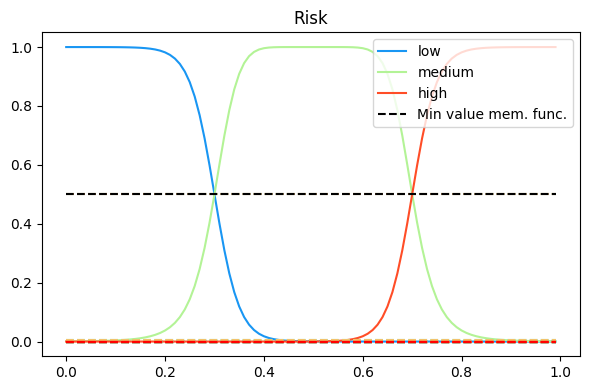

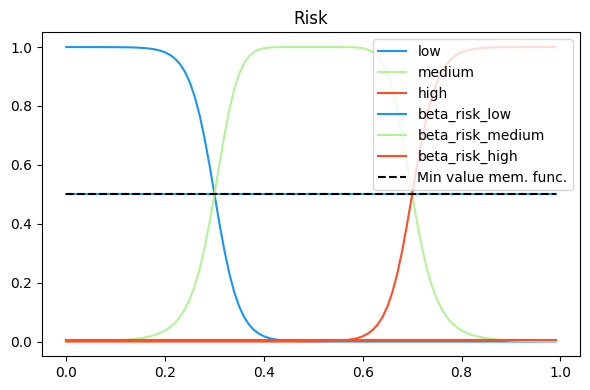

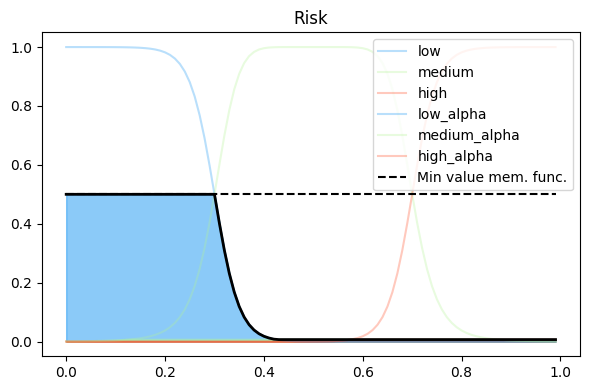

0.1803348206219504

In [33]:
run_system(data_dict, inputs, universe_of_variables, membership_functions,
           defuzz_method='centroid', graphics=True)

/tmp/ipykernel_1131450/2668549869.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap(color_map)
/tmp/ipykernel_1131450/45865598.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap(color_palette)


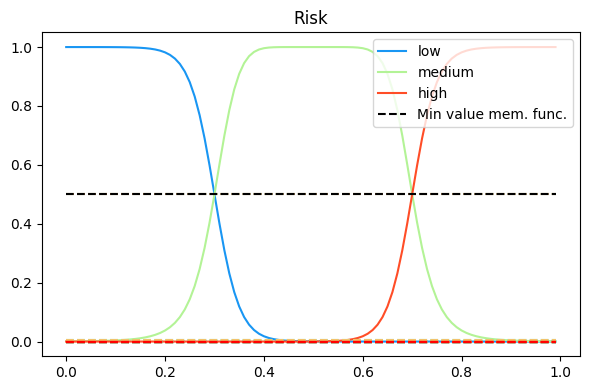

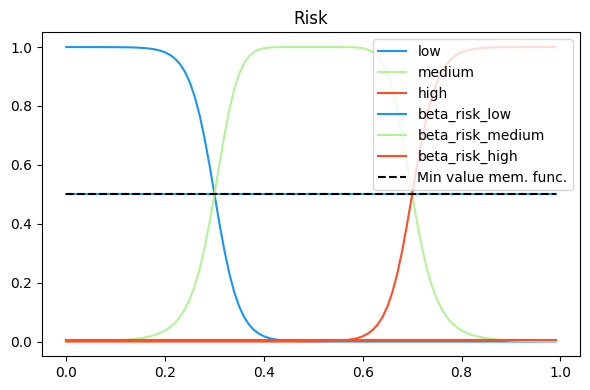

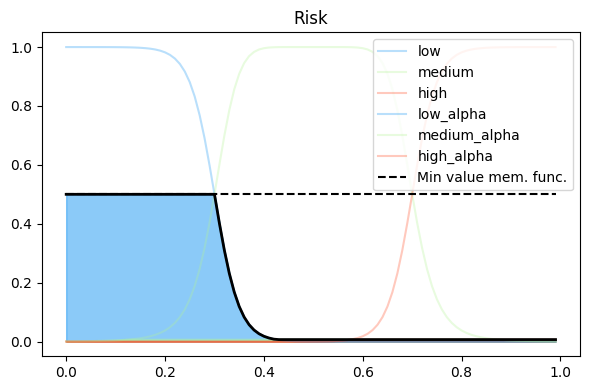

0.17102680494237074

In [34]:
run_system(data_dict, inputs, universe_of_variables, membership_functions,
           defuzz_method='bisector', graphics=True)

/tmp/ipykernel_1131450/2668549869.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap(color_map)
/tmp/ipykernel_1131450/45865598.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap(color_palette)


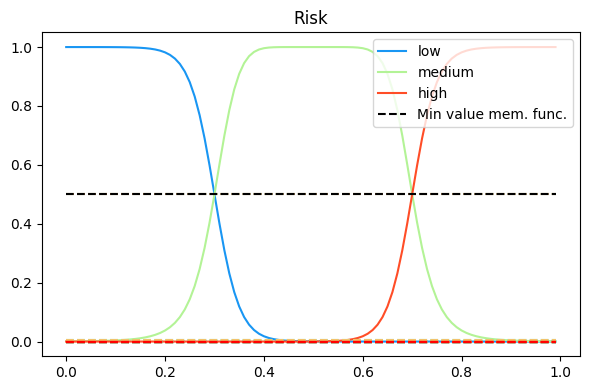

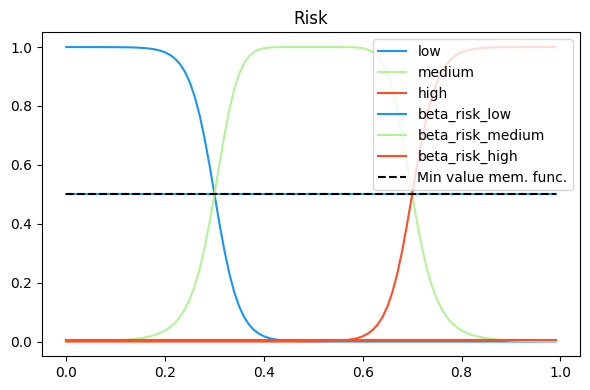

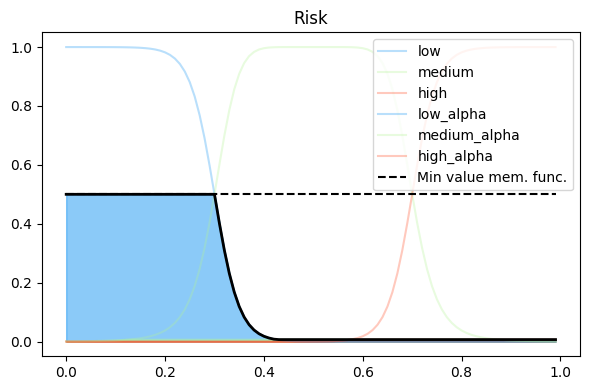

0.145

In [35]:
run_system(data_dict, inputs, universe_of_variables, membership_functions,
           defuzz_method='mom', graphics=True)

/tmp/ipykernel_1131450/2668549869.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap(color_map)
/tmp/ipykernel_1131450/45865598.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap(color_palette)


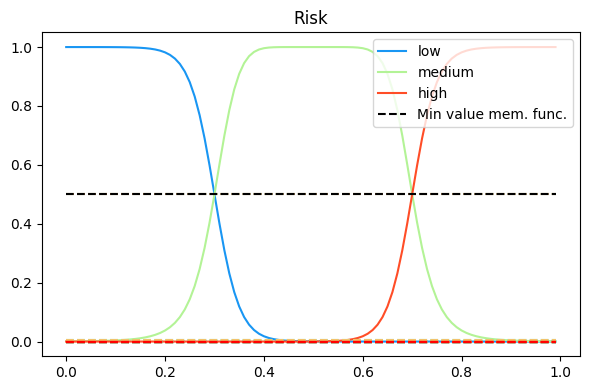

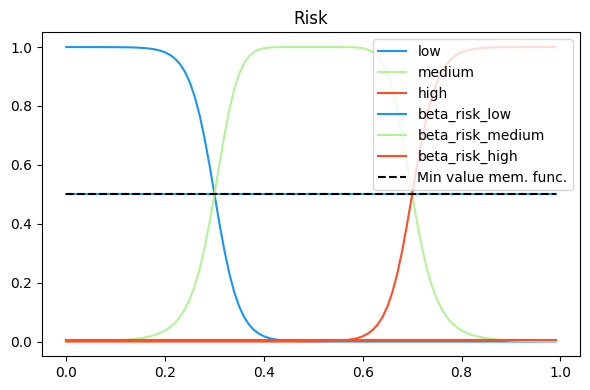

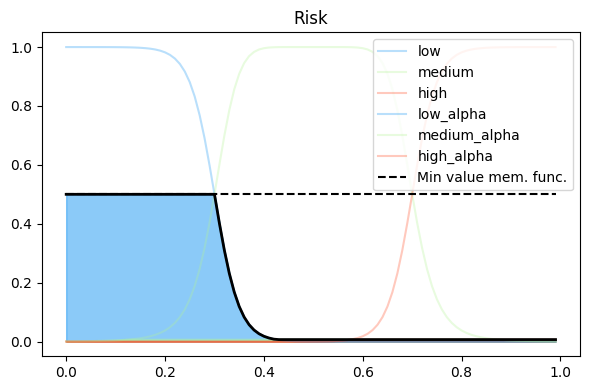

0.0

In [36]:
run_system(data_dict, inputs, universe_of_variables, membership_functions,
           defuzz_method='som', graphics=True)

/tmp/ipykernel_1131450/2668549869.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap(color_map)
/tmp/ipykernel_1131450/45865598.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap(color_palette)


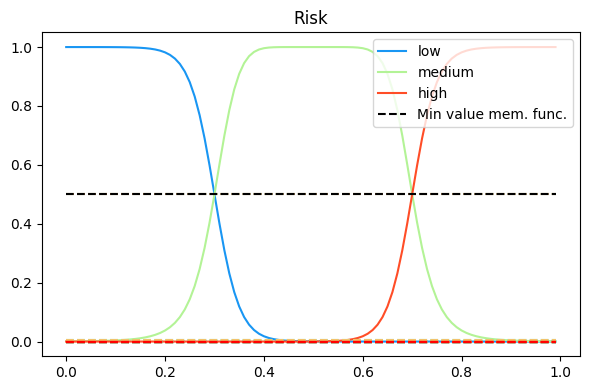

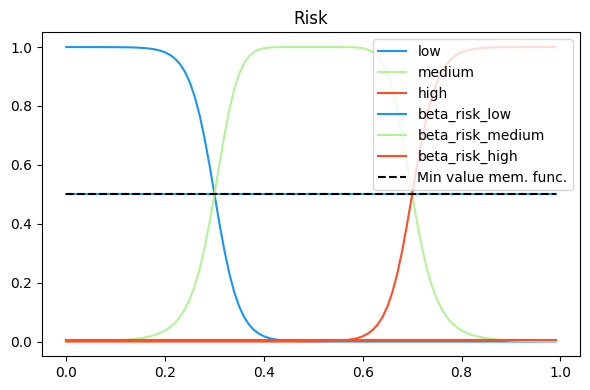

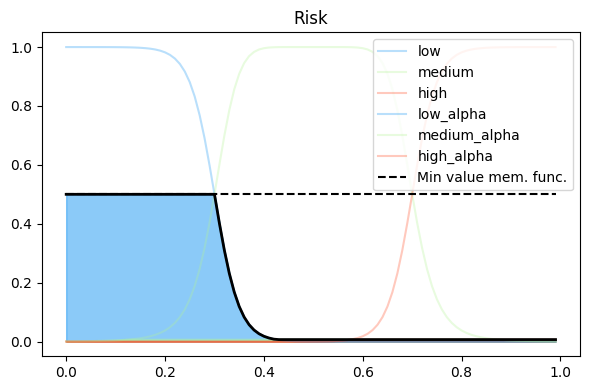

0.29

In [37]:
run_system(data_dict, inputs, universe_of_variables, membership_functions,
           defuzz_method='lom', graphics=True)

# Graphic response surface

In [38]:
data_dict = build_data_dict(universe_of_variables, membership_functions)

In [39]:
variable_x = 'x_withdrawal_percentage'
variable_y = 'x_hour'
x, y = np.meshgrid(universe_of_variables[variable_x],
                   universe_of_variables[variable_y])

# Create an empty array for z with the same shape as x or y
z = np.zeros_like(x)

vectorized_run_system = np.vectorize(lambda wp, h, td, tm: run_system(
    data_dict,
    {
    'withdrawal_percentage': wp,
    'hour': h,
    'transactions_per_day': td,
    'transactions_per_month': tm
    }, universe_of_variables, membership_functions, defuzz_method='centroid', graphics=False))

# Calculate z in a vectorized way
z = vectorized_run_system(x, y, 5, 20)

In [41]:
# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the surface graph
#surface = ax.plot_surface(x, y, z, cmap='rainbow')
surface = ax.plot_surface(x, y, z, cmap=color_map)

# Add a color bar
fig.colorbar(surface)

# Set up labels
ax.set_xlabel(variable_x)
ax.set_ylabel(variable_y)
ax.set_zlabel('Risk')
ax.set_title('Response surface')

# Show the graph
plt.show()

ImportError: Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2